Notes   

concat(): Combine DataFrames by rows (axis = 0) or columns (axis=1).   

Sticks the DataFrames together without using any keys.

In [9]:
# Sample dataset of job postings in January
job_postings_jan = pd.DataFrame({
    'job_id': [1, 2, 3, 4, 5],
    'job_title': ['Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Data Scientist', 'Data Engineer'],
    'company': ['Company A', 'Company B', 'Company C', 'Company D', 'Company E'],
    'job_posted_date': pd.to_datetime(['2024-01-02', '2024-01-07', '2024-01-14', '2024-01-19', '2024-01-24'])
})

job_postings_jan

,job_id,job_title,company,job_posted_date
0,1,Data Scientist,Company A,2024-01-02
1,2,Data Analyst,Company B,2024-01-07
2,3,Machine Learning Engineer,Company C,2024-01-14
3,4,Data Scientist,Company D,2024-01-19
4,5,Data Engineer,Company E,2024-01-24


In [10]:
# Sample dataset of job postings in February
job_postings_feb = pd.DataFrame({
    'job_id': [6, 7, 8, 9, 10],
    'job_title': ['Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Data Scientist', 'Data Engineer'],
    'company': ['Company F', 'Company G', 'Company H', 'Company I', 'Company J'],
    'job_posted_date': pd.to_datetime(['2024-02-05', '2024-02-09', '2024-02-12', '2024-02-18', '2024-02-22'])
})

job_postings_feb

,job_id,job_title,company,job_posted_date
0,6,Data Scientist,Company F,2024-02-05
1,7,Data Analyst,Company G,2024-02-09
2,8,Machine Learning Engineer,Company H,2024-02-12
3,9,Data Scientist,Company I,2024-02-18
4,10,Data Engineer,Company J,2024-02-22


If I try to merge these two using merge() method, the output will not be the one we wanted.

In [11]:
job_postings_jan.merge(job_postings_feb, on = 'job_title', suffixes = ('_jan', '_feb'))

,job_id_jan,job_title,company_jan,job_posted_date_jan,job_id_feb,company_feb,job_posted_date_feb
0,1,Data Scientist,Company A,2024-01-02,6,Company F,2024-02-05
1,1,Data Scientist,Company A,2024-01-02,9,Company I,2024-02-18
2,2,Data Analyst,Company B,2024-01-07,7,Company G,2024-02-09
3,3,Machine Learning Engineer,Company C,2024-01-14,8,Company H,2024-02-12
4,4,Data Scientist,Company D,2024-01-19,6,Company F,2024-02-05
5,4,Data Scientist,Company D,2024-01-19,9,Company I,2024-02-18
6,5,Data Engineer,Company E,2024-01-24,10,Company J,2024-02-22


We will do Concat method on these dataframes.... By using the concat() method, the second dataframe will get appended row wise beneath the first dataframe.

In [12]:
pd.concat([job_postings_jan, job_postings_feb])

,job_id,job_title,company,job_posted_date
0,1,Data Scientist,Company A,2024-01-02
1,2,Data Analyst,Company B,2024-01-07
2,3,Machine Learning Engineer,Company C,2024-01-14
3,4,Data Scientist,Company D,2024-01-19
4,5,Data Engineer,Company E,2024-01-24
0,6,Data Scientist,Company F,2024-02-05
1,7,Data Analyst,Company G,2024-02-09
2,8,Machine Learning Engineer,Company H,2024-02-12
3,9,Data Scientist,Company I,2024-02-18
4,10,Data Engineer,Company J,2024-02-22


Let's fix the indexes......

In [13]:
pd.concat([job_postings_jan, job_postings_feb], ignore_index = True)

,job_id,job_title,company,job_posted_date
0,1,Data Scientist,Company A,2024-01-02
1,2,Data Analyst,Company B,2024-01-07
2,3,Machine Learning Engineer,Company C,2024-01-14
3,4,Data Scientist,Company D,2024-01-19
4,5,Data Engineer,Company E,2024-01-24
5,6,Data Scientist,Company F,2024-02-05
6,7,Data Analyst,Company G,2024-02-09
7,8,Machine Learning Engineer,Company H,2024-02-12
8,9,Data Scientist,Company I,2024-02-18
9,10,Data Engineer,Company J,2024-02-22


-------------------------------------------------------------------------------------------------------

In [14]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

In [15]:
# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [16]:
# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [17]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


We are going to create some fake data in order to actually do the concatenate function on it, specifically, we are going to make individual dataframes for each months.

Lets start by creating a column that we can identify each month by....

In [19]:
df['job_posted_month'] = df['job_posted_date'].dt.strftime('%b')


Now lets break this up into 12 different dataframes because this dataframe has all the months of the year. The easiest way to do this is by storing it into a Dictionary

In [20]:
months = df['job_posted_month'].unique()

dict_months = {month: df[df['job_posted_month'] == month] for month in months}

dict_months['Jan']

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
20,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,None,NaN,NaN,Devoteam,"['r', 'python', 'sql', 'pandas', 'numpy', 'sci...","{'libraries': ['pandas', 'numpy', 'scikit-lear...",Jan
39,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,None,NaN,NaN,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",Jan
53,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,None,NaN,NaN,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws']...",Jan
55,Data Scientist,Data Scientist,"São Paulo, State of São Paulo, Brazil",via BeBee,Full-time,False,Brazil,2023-01-03 23:02:27,False,False,Brazil,None,NaN,NaN,Mars,"['python', 'sql', 'azure']","{'cloud': ['azure'], 'programming': ['python',...",Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785699,Software Engineer,Simulation Engineer,"Prague, Czechia",via Trabajo.org,Full-time,False,Czechia,2023-01-16 06:35:30,False,False,Czechia,None,NaN,NaN,Ricardo Prague s.r.o.,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",Jan
785700,Data Engineer,Data Engineer Ssr/Sr,"Mexico City, CDMX, Mexico",via Trabajo.org,Full-time,False,Mexico,2023-01-12 06:19:55,True,False,Mexico,None,NaN,NaN,Tsoft,"['python', 'r', 'azure', 'aws', 'gcp', 'spark'...","{'cloud': ['azure', 'aws', 'gcp'], 'libraries'...",Jan
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,Jan
785704,Business Analyst,Business Analyst,"Prague, Czechia",via Trabajo.org,Full-time,False,Czechia,2023-01-16 06:35:20,False,False,Czechia,None,NaN,NaN,Cleverlance,None,None,Jan


Suppose your Boss needs 2023 Quarter 1 data, what we can do is........

In [25]:
pd.concat([dict_months['Jan'], dict_months['Feb'], dict_months['Mar']], ignore_index = True)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
1,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,None,NaN,NaN,Devoteam,"['r', 'python', 'sql', 'pandas', 'numpy', 'sci...","{'libraries': ['pandas', 'numpy', 'scikit-lear...",Jan
2,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,None,NaN,NaN,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",Jan
3,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,None,NaN,NaN,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws']...",Jan
4,Data Scientist,Data Scientist,"São Paulo, State of São Paulo, Brazil",via BeBee,Full-time,False,Brazil,2023-01-03 23:02:27,False,False,Brazil,None,NaN,NaN,Mars,"['python', 'sql', 'azure']","{'cloud': ['azure'], 'programming': ['python',...",Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220479,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete...",Mar
220480,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi...",Mar
220481,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",Mar
220482,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",Mar


This will concatenate the Q1 data into a dataframe. And we assign it into a variable, so we can plot it into a bar char...

In [26]:
df_q1 = pd.concat([dict_months['Jan'], dict_months['Feb'], dict_months['Mar']], ignore_index = True)

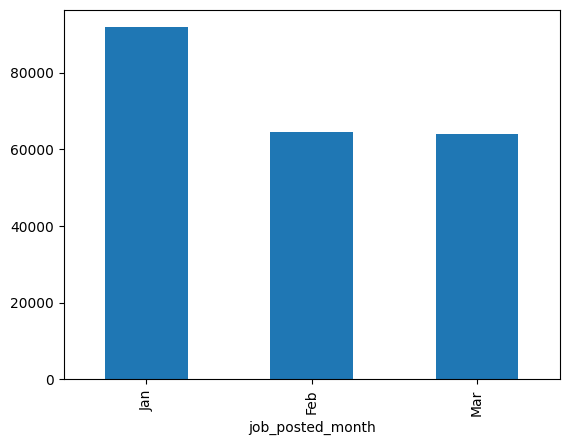

In [27]:
df_q1['job_posted_month'].value_counts().plot(kind = 'bar')
plt.show()